**1a) K-Means algorithm**

Input: 
n: Number of clusters
max_iter: Maximum iterations


In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class KMeans:
    def __init__(self, k, max_iter, do_normalize=True):
        self.__k = k
        self.__max_iter = max_iter
        self.__max = 0
        self.__min = 0
        self.__do_normalize = do_normalize
        
    def __normalize(self, X):
        if not self.__do_normalize:
            return X
        
        (m, n) = X.shape      # m samples with n features
        self.__max = np.max(X, axis=0)
        self.__min = np.min(X, axis=0)
        scale = self.__max - self.__min
        if np.any(scale==0):  # This is NOT industry standard way of doing things....
            return X
        else:
            return (X - self.__min)/scale
    
    def __denormalize(self, X):
        if self.__do_normalize:
            return (self.__max - self.__min)*X + self.__min
        else:
            return X
    
    def __centroid_index(self, X, centroids):
        (m, n) = X.shape
        distances = np.ndarray((m,self.__k))
        
        for i in range(m):
            for j in range(self.__k):
                distances[i,j] = np.linalg.norm(X[i,:] - centroids[j, :])

        minimum_distances_indexes = np.argmin(distances,axis=1)    # This is the centroid index for all samples due to minimization. Should be of dimension m
        return minimum_distances_indexes
        
    def fit_predict(self, X):
        
        
        X_norm = self.__normalize(X)
        
        (m, n) = X.shape      # m samples with n features
        centroids = np.random.rand(self.__k, n)     # k centroids with n features
        
        S_old = np.zeros(m,)
        for _ in range(self.__max_iter):
            
            # Step 1) Find which centroid each sample belongs to due to minimum distance 
            S = self.__centroid_index(X_norm, centroids)    # Will be a array of dimension m with a content ranging from 0..k-1 (cluster number) in each element
            if np.all(S_old == S) :
                return S, self.__denormalize(centroids)
            
            
            # Step 2) Based on each collection of points, find the new centroid center.
            # new_centroids = np.array(self._k,n)
            for i in range(self.__k):
                cluster_points_i = X_norm[S == i,:]
                if len(cluster_points_i) != 0 :
                    centroids[i] = np.mean(cluster_points_i, axis=0)  # Update centroid position
                else:
                    centroids[i] = np.random.rand(n)  # No idea if this will work
                    print("Hmmm")
                # print(centroids[i])
            
            S_old = S
            
        return S, self.__denormalize(centroids)

# # Test with 2.dimensional data
# np.random.seed(42)
# X = np.random.rand(200, 2)
# iterations = 20
# clusters = 5
# kmeans = KMeans(clusters, iterations)
# S, centroids = kmeans.fit_predict(X)
# 
# # plt.scatter(X[:,0], X[:,1])
# 
# colors = cm.rainbow(np.linspace(0, 1, clusters))
# for center, color in zip(centroids, colors):
#     plt.scatter(center[0], center[1], color=color, marker="x")
# 
# for i in range(clusters) :
#     cluster_point_i = X[S == i,:]
#     color = colors[i]
#     plt.scatter(cluster_point_i[:,0], cluster_point_i[:,1], color=color)
#         
    

**1b) Test your implementation on the datasets provided in blobs.csv and flame.csv.**

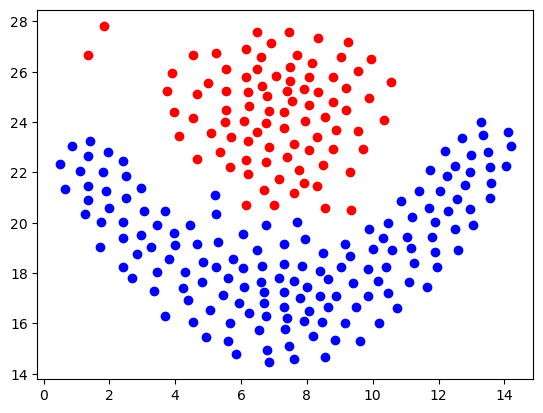

In [142]:
# y_and_X = np.genfromtxt("data/blobs.csv", delimiter=' ', skip_header=2)
y_and_X = np.genfromtxt("data/flame.csv", delimiter=' ', skip_header=5)
X = y_and_X[:, 1:]

y = y_and_X[:, 0]
X_0 = X[y==0,:]
X_1 = X[y==1,:]

# Ground truth
plt.scatter(X_0[:,0], X_0[:,1], color="red")
plt.scatter(X_1[:,0], X_1[:,1], color="blue")



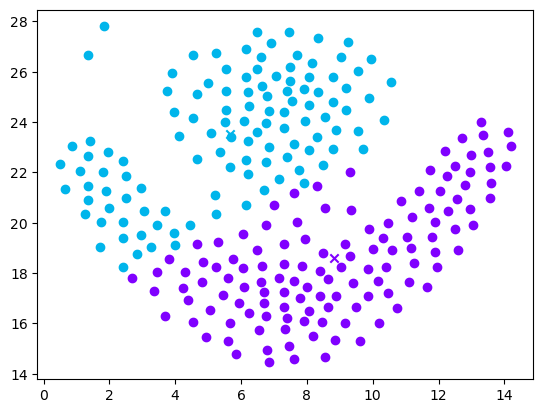

In [143]:
# Now our clustering alg 
kmeans = KMeans(2, 40)
S, centroids = kmeans.fit_predict(X)
for center, color in zip(centroids, colors):
    plt.scatter(center[0], center[1], color=color, marker="x")

for i in range(clusters) :
    cluster_point_i = X[S == i,:]
    color = colors[i]
    plt.scatter(cluster_point_i[:,0], cluster_point_i[:,1], color=color)


**1c) Test your implementation on the optdigits dataset provided in optdigits.csv. Plot the centroids of each
cluster and use these to determine which digits they represent. Plot some of the wrongly assigned digits,
and explain why they were misclassified.**

4.0


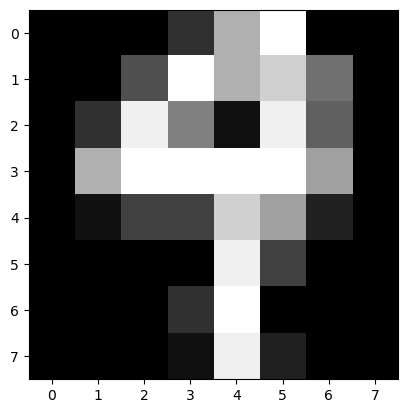

In [170]:
y_and_X = np.genfromtxt("data/optdigits.csv", delimiter=' ', skip_header=5)
y = y_and_X[:, 0]
X = y_and_X[:, 1:]

img = X[3].reshape((8,8))
print(y[3])
plt.imshow(img, cmap='gray')


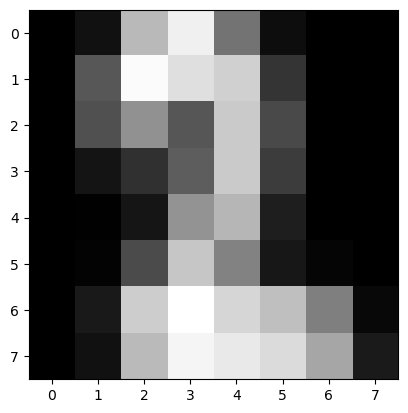

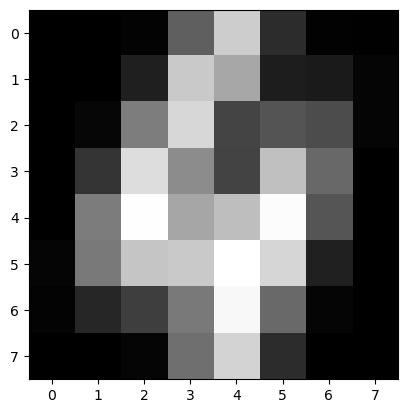

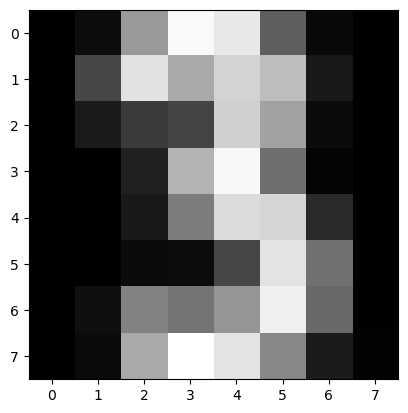

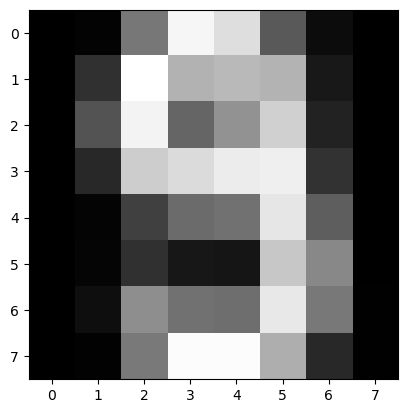

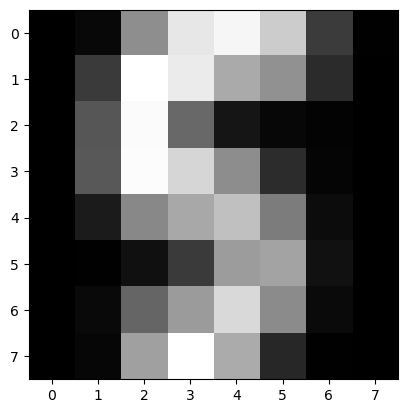

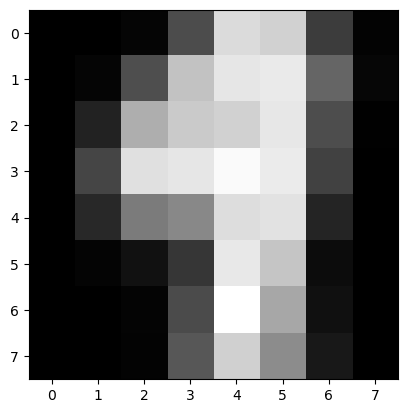

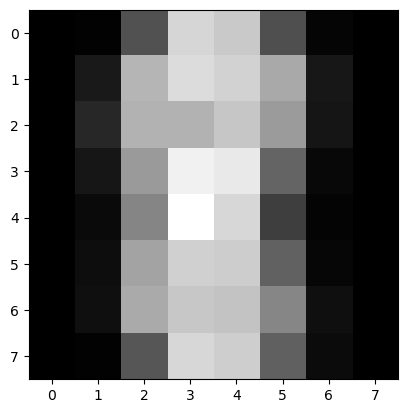

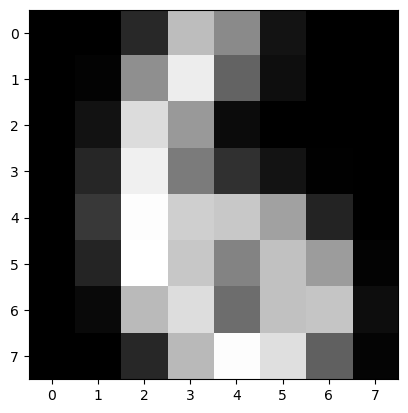

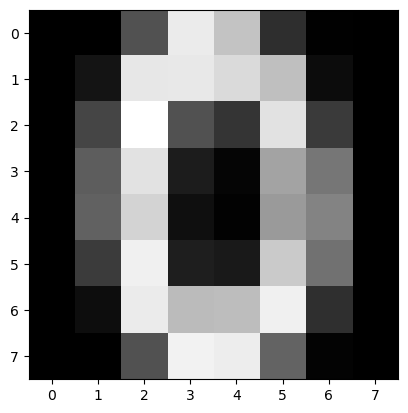

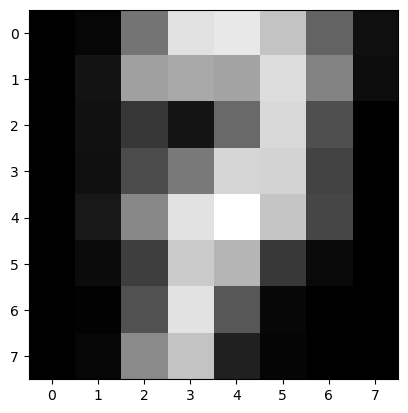

In [184]:
kmeans = KMeans(10, 1000, do_normalize=False)
S, centroids = kmeans.fit_predict(X)
for i in range(len(centroids)):
    img = centroids[i].reshape((8,8))
    plt.imshow(img, cmap='gray')
    plt.show()
    


Conclusion: The clustering seems to produce some "template" images, but they seem not to be stable. Enhancements on it could involve running it several times, and look for optimum silhouette score.
The next tasks is somehow not possible to solve before this enhancement has been implemented 

**Task 2a) - 2c)**
We only perform the task on the first graph a)

In [51]:
def normalize_rows(matrix):
    # Calculate the sum of each row
    col_sums = np.sum(matrix, axis=0, keepdims=True)

    # Divide each element in the matrix by its corresponding row sum
    normalized_matrix = matrix / col_sums

    return normalized_matrix

# This is taken from the lecture notes
def power_iteration(M, num_iterations: int, pi=None) :
    
    # The initial probability distribution of the nodes.
    if pi is None :
        b_k = np.random.rand(M.shape[1])
    else: 
        b_k = pi
    
    for i in range(num_iterations):
        b_k1 = np.dot(M, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1/b_k1_norm
        
        
    return b_k

A = np.array([[0, 1, 1, 1], 
              [0, 0, 0, 1], 
              [1, 1, 0, 1], 
              [1, 1, 0, 0]])
H = normalize_rows(A)
# S = power_iteration(H, 20)

# Now, let's add the random jump
alpha = 0.15
B = np.ones((4,4))/4
G = (1-alpha)*H + alpha*B
# pi = np.array([1, 1, 1, 1])/4
power_iteration(H, 20, pi)


array([0.72279385, 0.1355196 , 0.54211237, 0.40659277])

**2d) We add another page 5 that only links to page 3 and back**

In [50]:
A = np.array([[0, 1, 1, 1, 0],
              [0, 0, 0, 1, 0],
              [1, 1, 0, 1, 1],
              [1, 1, 0, 0, 0],
              [0, 0, 1, 0, 0]])
H = normalize_rows(A)
alpha = 0.15
B = np.ones((5,5))/5
G = (1-alpha)*H + alpha*B
power_iteration(H, 20)


array([0.50183441, 0.0949691 , 0.72393794, 0.26977695, 0.37719669])